In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
mergin_cleaned_df = pd.read_csv('merged_cleaned_agg_outliers_obs_datasets.csv')

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
16 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\AppData\Local\Prog

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Model Performance (After Tuning):
Mean Absolute Error (MAE): 270750.83
Mean Squared Error (MSE): 1017074017015.45
Root Mean Squared Error (RMSE): 1008500.88
R-squared (R2): 0.44

Feature Importance:
           Feature  Importance
0  light_intensity    0.512091
1       avg_d_kbps    0.487909


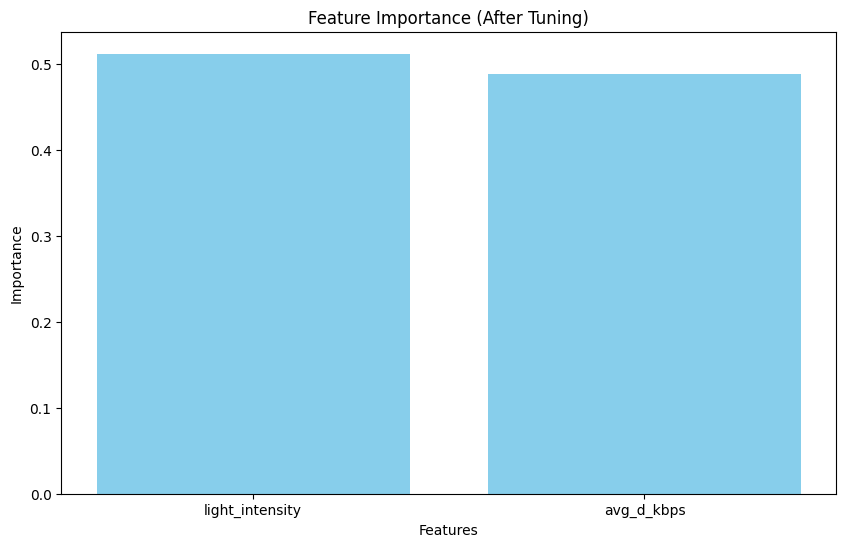

In [3]:
# Prediction Model: Hyperparameter Tuning for Random Forest

mergin_cleaned_df['Economic_Growth_Proxy'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

features = ['light_intensity', 'avg_d_kbps']
target = 'Economic_Growth_Proxy'

for feature in features:
    if feature not in mergin_cleaned_df.columns:
        raise ValueError(f"Feature '{feature}' is missing in the dataset.")

X = mergin_cleaned_df[features]
y = mergin_cleaned_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:")
print(best_params)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance (After Tuning):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title("Feature Importance (After Tuning)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
